# Morphological Operators
## Vision Computer
- Sara Echeverría 21371
- Melissa Pérez 21385
- Ricardo Mendez 21289

In [1]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import skimage as ski
from skimage.filters import thresholding as th

from skimage import morphology as mo
from scipy import ndimage as ndi

### Task 01

### Task 02

### Task 03
Aplicar diferentes operaciones morfológicas a las siguientes imágenes en escala de grises

In [2]:
# funcion para cargar imagen
def load_image(image_path):
    return ski.io.imread(image_path, as_gray=True)

In [3]:
# operaciones morfologicas con la carga de imagen previa
def apply_morphology(image, operation, se):
    operations = {
        'dilate': mo.dilation,
        'erode': mo.erosion,
        'opening': mo.opening,
        'closing': mo.closing,
        'white_tophat': mo.white_tophat
    }
    return operations[operation](image, se)

In [4]:
def display_results(image, results, titles):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    ax = axes.ravel()
    
    for i, (img, title) in enumerate(zip([image] + results, ['Original'] + titles)):
        ax[i].imshow(img, cmap='gray')
        ax[i].set_title(title)
        ax[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [5]:
# execution
def exc(image_path):
    image = load_image(image_path)
    se = mo.disk(5)
    
    operations = ['dilate', 'erode', 'opening', 'closing', 'white_tophat']
    results = [apply_morphology(image, op, se) for op in operations]
    
    display_results(image, results, ['Dilatación', 'Erosión', 'Opening', 'Closing', 'White Top-Hat'])

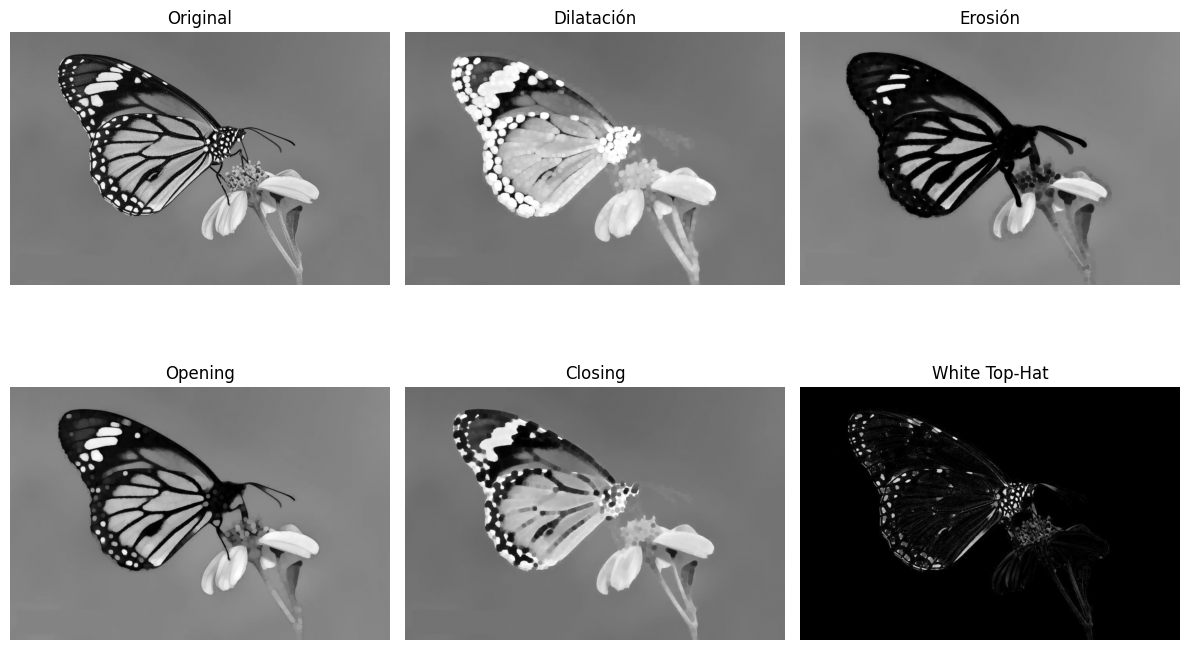

In [6]:
img1 = "img/butterfly.jpeg"
exc(img1)

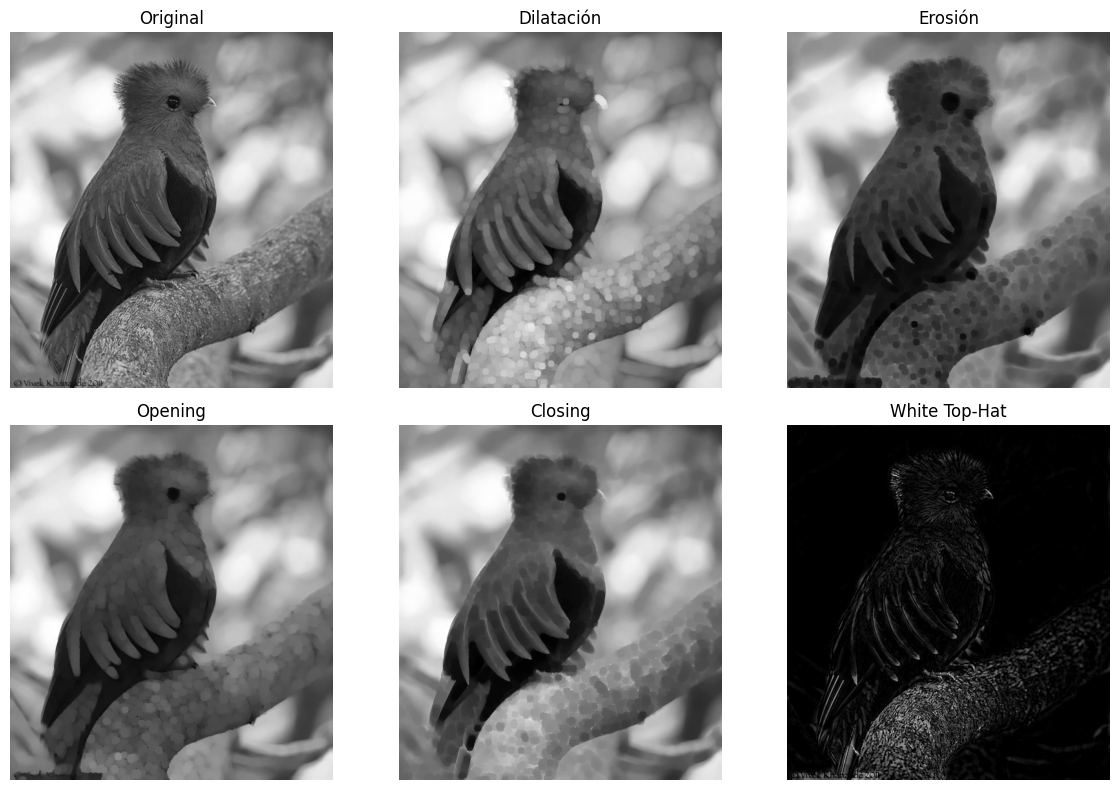

In [7]:
img2 = "img/quetzalgris.png"
exc(img2)

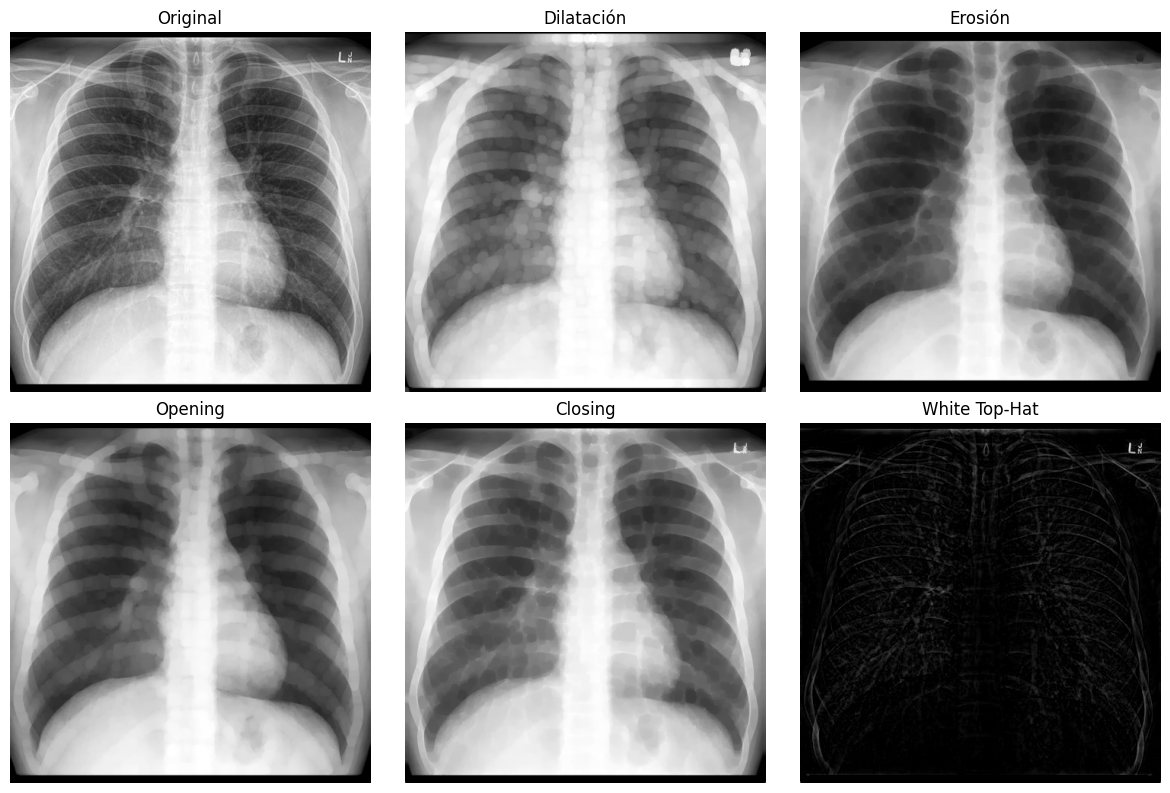

In [8]:
img3 = "img/chestxray.jpeg"
exc(img3)

- ¿Cuál es el efecto de aplicar dilatación y erosión a estas imágenes?
    - Al aplicar la dilatación, se expanen las regiones más claras por lo que se evidencian más colores blancos en la imagen.
    - Con la erosión sucede lo opuesto a la dilatación. Se intensifican las regiones oscuras y reduce las partes brillantes.
- ¿Cuál es el efecto de aplicar opening y closing a estas imágenes?
    - Opening, elimina algunos detalles brillantes y mantiene la estructura de los objetos. Genera un poco más de contraste. Se debe a que aplica eroción seguida de la dilatación.
    - Closing, rellena espacios oscuros en las partes brillantes. Aplica dilatación seguida de erosión.
- ¿Qué hace el white top-hat? ¿Para qué puede ser útil?
    - Se muestra solamente la silueta o el contorno de la imagen. Extrae todos los detalles de blancos y resalta los más finos, generando contraste. 
    - Puede ser útil cuando se busca resaltar detalles finos y en la eliminación de variaciones de iluminación.

### Task 04
Obtener el gradiente morfológico ∇(I) = (I ⊕ B) − (I ⊖ B)

In [9]:
# funcion para aplicar gradiente morfologico
def morphological_gradient(image, selem):
    dilated = mo.dilation(image, selem)
    eroded = mo.erosion(image, selem)
    return dilated - eroded

In [10]:
def results(original, gradient):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Imagen Original")
    axes[0].axis('off')

    axes[1].imshow(gradient, cmap='gray')
    axes[1].set_title("Gradiente Morfológico")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [11]:
# cargar imagen
image_path = "img/brain-scan.jpeg"
image = load_image(image_path)

In [12]:
# aplicar el gradiente
selem = mo.disk(3)
gradient = morphological_gradient(image, selem)

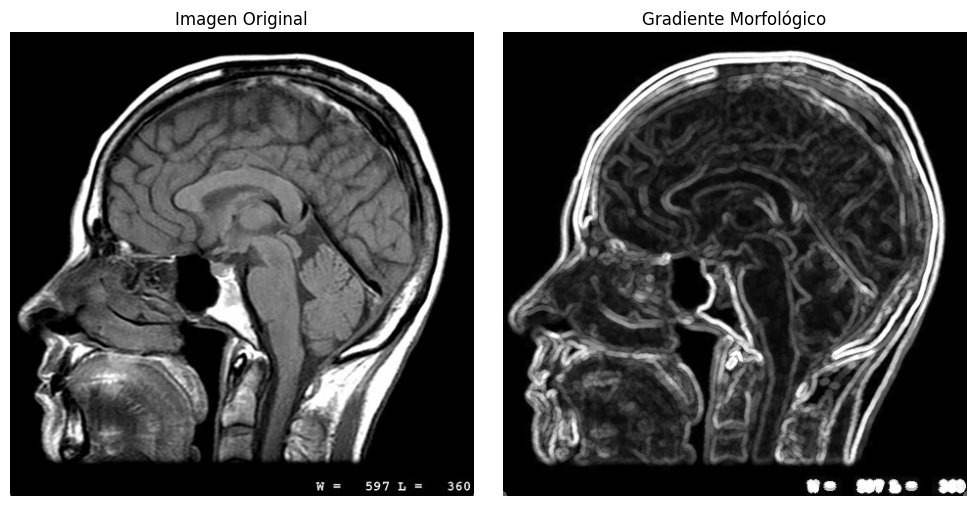

In [13]:
results(image, gradient)

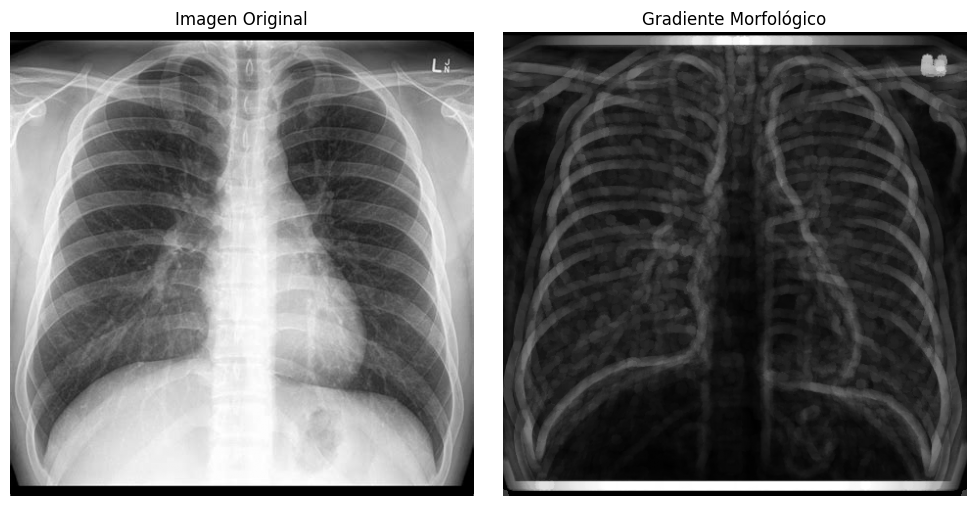

In [14]:
# otro resultado
image_path = "img/chestxray.jpeg"
image = load_image(image_path)

selem = mo.disk(5)
gradient = morphological_gradient(image, selem)

results(image, gradient)

- Resultado obtenido:
    - El gradiente morfológico resalta los bordes de los objetos dentro de la imagen. Esto lo obtiene gracias a que resta la erosión de la dilatación para poder mostra la intensidad entre regiones oscuras y claras. En los dos resultados, su aplicación es beneficiosa porque son imágenes de rayosX y resalta los bordes. Aún así, si se probara con imágenes que tienen poco contraste, el gradiente sería menos evidente.
- ¿Por qué se llamda gradiente?
    - Matemáticamente, el gradiente de una función representa la tasa de cambio en cada punto del espacio. En procesamiento de imágenes, se le llama gradiente porque indica cómo varía la intensidad de los píxeles en diferentes direcciones. El gradiente morfológico se obtiene restando la erosión de la dilatación, lo que resalta los bordes de los objetos en la imagen al mostrar los cambios más significativos en la intensidad.

### Task 05

### Task 06

### Task 07
La construcción del esqueleto de un objeto binario con operaciones morfológicas se basa en la erosión progresiva. Esto significa que se va reduciendo la estructura del objetvo, preservando su conectividad. Este proceso se hace eliminando iterativamente los píxeles del borde manteniéndolos unidos. 

Puede describirse mediante el siguiente algoritmo:
1. Aplicar erosiones sucesivas en el objeto
2. Realizar una apertura morfológica para conservar los puntos de unión
3. Almacenar los puntos en una estructura
4. Continuar las iteraciones hasta conseguir que el objeto "desaparezca"
5. Se muestra la unión de todos los puntos acumulados, mostrando el esqueleto del objeto

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, io, color
from scipy import ndimage

In [16]:
image = io.imread("img/binary-img.png", as_gray=True) > 0.5

In [17]:
# esqueletización
skeleton = morphology.skeletonize(image)

In [18]:
# transformada de distancia desde el borde
distance_from_edge = ndimage.distance_transform_edt(image)

In [19]:
# transformada de distancia desde el esqueleto
distance_from_skeleton = ndimage.distance_transform_edt(skeleton)

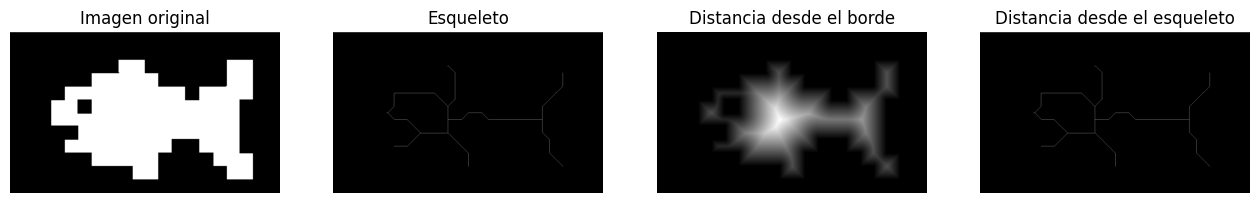

In [20]:
# visualización
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
titles = ["Imagen original", "Esqueleto", "Distancia desde el borde", "Distancia desde el esqueleto"]
images = [image, skeleton, distance_from_edge, distance_from_skeleton]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()

### Task 08
El prunning es la eliminación de ramificaciones no deseadas de un objeto binario usando operaciones morfológicas. Esta poda puede realizarse a través de:
- Erosión
- Conectividad
- Thinning

In [21]:
# poda mediante erosión
pruned_skeleton = morphology.erosion(skeleton, morphology.disk(1))

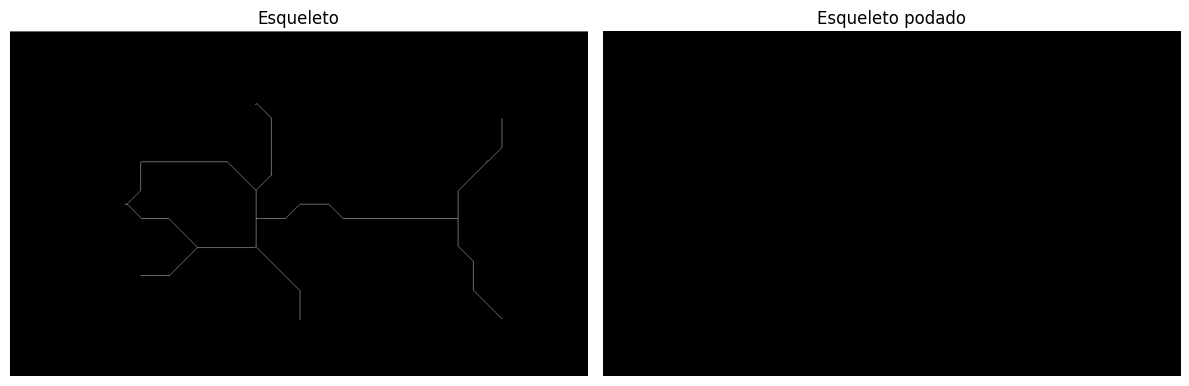

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(skeleton, cmap='gray')
axes[0].set_title("Esqueleto")
axes[0].axis('off')

axes[1].imshow(pruned_skeleton, cmap='gray')
axes[1].set_title("Esqueleto podado")
axes[1].axis('off')

plt.tight_layout()
plt.show()